<h3>USFWS EDA Plot Group 5 Multi-survey percent gravel and fines control vs treatment box plots</3>

This notebook, and the plots that extend from it, presents the distribution of coarse (gravels, phi = -1) and finer grain (phi >= 2.5) sands in the Pea Island surveyed beach data. 

Processing is grouped across all surveys such that the final plots show a series of boxplot pairs (control vs treatment) for each beach survey. **The key to making the magic happen in this notebook is the file: USFWS_Survey_Plotting_Data.csv. You need this file as input for generating the Group 5 plots!** Here, you'll find all of the survey data from the July, 2014 initial to the most recent (entered), computed as fractional weight percentages. Update the USFWS_Survey_Plotting_Data.csv file as new surveys are accumulated...

The notebook 


**Supports:**

transects=['C11','C10','C9','C8','C7','C6','C5','C4','C3','C2','C1','T1','T2','T3','T4','T5','T6','T7','T8','T9','T10',
'T11','T12','T13','T14','T15','T16']

surveys=[201407, 201409, 201504, 201508, 201602, 201605, 201608, 201610 ]

phis=['phi-1','phi-0.5','phi_0','phi_0.5','phi_1','phi_1.25','phi_1.5','phi_1.75','phi_2','phi_2.5','phi_3','phi_3.5','phi_4','remainder']

whole phis=['phi_-1','phi_0','phi_1','phi_2','phi_3','remainder']

samples=['S1','S2','S3','S5','S4']
<br /><br />

--Notebook created circa: 10/2016
Author: Paul P
<br />

**Instructions:**
1. Update the User Inputs cell, below, adding in the name of the new survey data spreadsheet and the id for the new survey
2. Under Cell -> Run All



**Notes:**
1. The file USFWS_Survey_Plotting_Data.csv file should be updated to reflect any new beach monitoring surveys to add prior to running this notebook. The notebook PreProcess_Update_USFWS_Survey_Plotting_Data_file is designed to do this update.

2. Keep in mind that, as you add more and more surveys, more and more surveys (boxplot pairs) will be drawn in the final plots. Things could thus get really crowded after a while!



**Changes:**
1. 3/31/2017 - Merged the phi 4 and remainder values into a single remainder column in the file USFWS_Survey_Plotting_Data.csv. The phi 4 screen was dropped early in the program and is no longer in use.

2. 4/25/2017 - Moved the transect sample location query string (for sample locs S1 thru S5) from the Preprocessing II cell to a seperate celll following Pp II. Added plotting cells to generate plot graphics for the % fines and % gravels for the combined survey samples (the _all_ plots). 
<br />

--keywords: Python, pandas, matplotlib, box plot, median, sand sediment grain size analysis, Pea Island, North Carolina

<h4>Load the requisite modules and libraries</h4>

In [41]:
# import requiste Python libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<h4>User Inputs:</h4>

In [42]:
####################################################################################
datapath='/Users/paulp/GoogleDrive/projects/PeaIslandBeachMonitoring/data/' # where your data is stored...
fn='USFWS_Survey_Plotting_Data.csv'     # NOTE this file contains all surveys from 7/2014 thru 8/2017, inclusive

plotpath='/Users/paulp/GoogleDrive/projects/PeaIslandBeachMonitoring/plots/plotGroup5/' # where your plots end up...

sample='S5'
date='201708'      # MMDDYYYY  the survey date. We use this to maintain older versions of the Group 5 plot files

####################################################################################

<h4>Load data from source into a pandas dataframe</h4>

In [43]:
# use the following lines to read from source: 'USFWS_Survey_Plotting_Data.csv'  
hdr=['group','transect','sample','survey','phi_-1','phi_-0.5','phi_0','phi_0.5','phi_1','phi_1.25','phi_1.5','phi_1.75','phi_2','phi_2.5','phi_3','phi_3.5','remainder']
df=pd.read_csv(datapath+fn, names=hdr ).fillna(0) 

In [44]:
df.dtypes

group         object
transect      object
sample        object
survey         int64
phi_-1       float64
phi_-0.5     float64
phi_0        float64
phi_0.5      float64
phi_1        float64
phi_1.25     float64
phi_1.5      float64
phi_1.75     float64
phi_2        float64
phi_2.5      float64
phi_3        float64
phi_3.5      float64
remainder    float64
dtype: object

<h4>Data Preprocessing II: (Aggregating individual screens into gravel and fine fractions)</h4>

In [45]:
# compute the sample percentage that is in the gravel and fines fractions:
# 1., sum all the individual bin (phi) weights:
df['total_wt']=df['phi_-1']+df['phi_-0.5']+df['phi_0']+df['phi_0.5']+df['phi_1']+df['phi_1.25'] \
+df['phi_1.5']+df['phi_1.75']+df['phi_2']+df['phi_2.5']+df['phi_3']+df['phi_3.5']+df['remainder']

# 2., using the phi_-1 field as the 'gravel' weight fraction:
df['pgravel']=df['phi_-1']    #/df['total_wt'])*100.0

               
# 3., combine phi 2.5, 3.0, 3.5, 4.0, and pan (remainder) to create a fines field:
df['pfines']=df['phi_2.5']+df['phi_3']+df['phi_3.5']+df['remainder']   #/df['total_wt'])*100.0

# replace the NaN values in the new fields with 0s:
df=df.fillna(0)

# drop the now unnecessary fields: phi_-1, phi_-0.5, phi_0, phi_0.5, phi_1, phi_1.25, phi_1.5, phi_1.75, phi_2
# phi_2.5, phi_3, phi_3.5, phi_4, and remainder:
df=df.drop(['phi_-1','phi_-0.5','phi_0','phi_0.5','phi_1','phi_1.25','phi_1.5','phi_1.75','phi_2','phi_2.5'], axis=1)
df=df.drop(['phi_3','phi_3.5','remainder'], axis=1)



<h4>Data Preprocessing III: (Extracting records from the df for only the currently defined sample (user input: _sample_) NOTE: if you're creating the combined (.all) plot where all 4/5 transect samples are considered together) there is no need to run the search query, below)</h4>

In [46]:
query_string = 'sample == '+'\"'+sample+'\"'
df1=df.query(query_string)
#df1=df.groupby(['survey', 'transect'], sort=False, as_index=False)[['pgravel','pfines']].sum()

#df1

<h4>Plot the transect SAMPLE Gravel Fraction (for the combined .all plot see below):</h4>

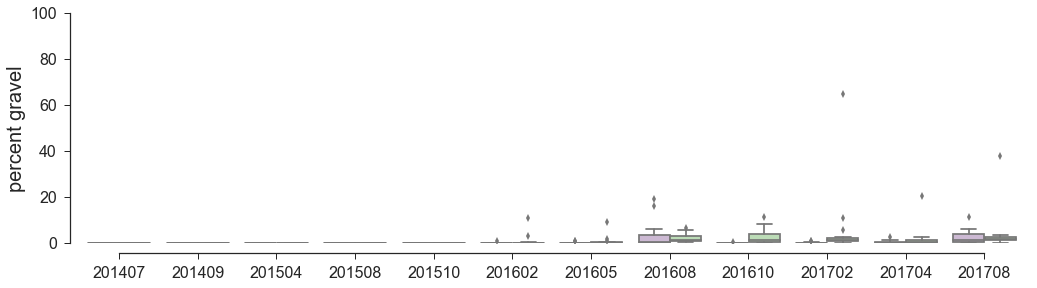

In [47]:
####### LET'S PLOT STUFF -- THE GRAVELS #######

figpg = plt.figure(figsize=(15,5))
axspg = figpg.add_subplot(1,1,1)
figpg.tight_layout(pad=5.1, w_pad=0.5, h_pad=2.0)

sns.set_context('talk')
sns.set(style="ticks")
#sns.set(rc={'axes.facecolor':'white', 'grid.color': 'white'})
# nested boxplot showing percent gravel in samples by survey, by group
axc=sns.boxplot(x='survey', y='pgravel', hue='group', data=df1, palette='PRGn' )

axc.set(ylim=(0,100))
sns.despine(offset=10, trim=True)

plt.xticks(size=16)
plt.yticks(size=16)
axc.set_xlabel('') 
plt.ylabel('percent gravel', fontsize=20)
axc.legend_.remove()

plt.savefig(plotpath+sample+'_'+date+'_percent_gravel.jpg', dpi=300) 

<h4>Plot the SAMPLE Fines Fraction (for the combined .all plot, see below):</h4>

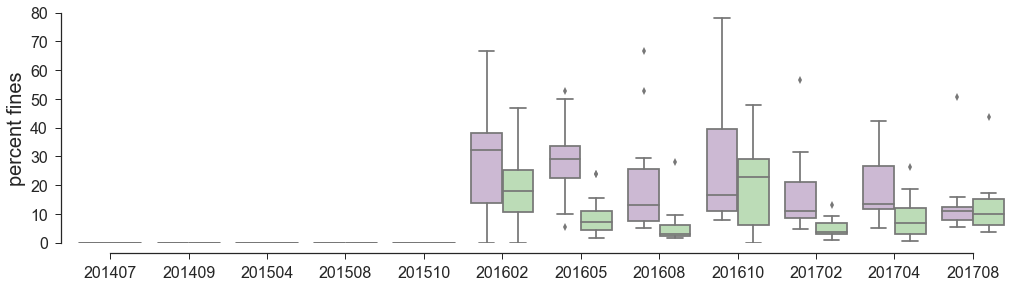

In [48]:
####### LET'S PLOT STUFF -- THE FINES #######

sns.set_context('talk')
figpf = plt.figure(figsize=(15,5))
axspf = figpf.add_subplot(1,1,1)
figpf.tight_layout(pad=3.1, w_pad=0.5, h_pad=2.0)

sns.set(style="ticks")

# nested boxplot showing percent fines in samples by survey, by group
axf=sns.boxplot(x='survey', y='pfines', hue='group', data=df1, palette='PRGn' )

axf.set(ylim=(0,80))
sns.despine(offset=10, trim=True)  # despine must come AFTER the axis limits are set!!!

plt.xticks(size=16)
plt.yticks(size=16)
axf.set_xlabel('')    #plt.xlabel('survey', fontsize=14)
plt.ylabel('percent fines', fontsize=20)
axf.legend_.remove()

plt.savefig(plotpath+sample+'_'+date+'_percent_fines.jpg', dpi=300)       

<h4>Plot the combined gravel fraction (this is the gravel fraction .all plot):</h4>

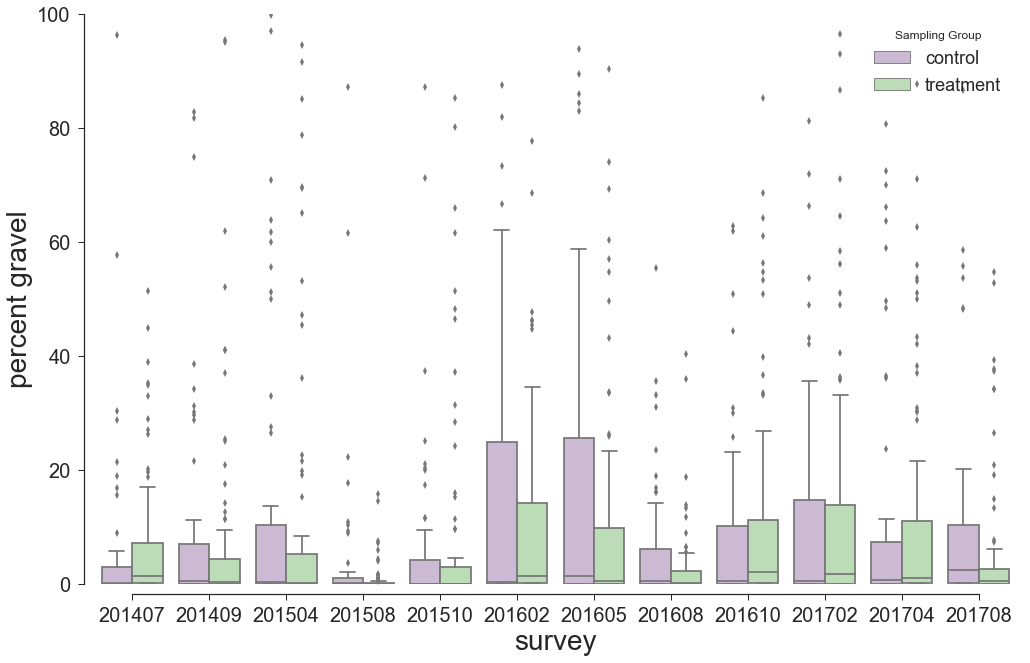

In [49]:
figpg = plt.figure(figsize=(15,10))
axspg = figpg.add_subplot(1,1,1)
figpg.tight_layout(pad=5.1, w_pad=0.5, h_pad=2.0)

sns.set_context('talk')
sns.set(style="ticks")
#sns.set(rc={'axes.facecolor':'white', 'grid.color': 'white'})
# nested boxplot showing percent gravel in samples by survey, by group
axc=sns.boxplot(x='survey', y='pgravel', hue='group', data=df, palette='PRGn' )

axc.set(ylim=(0,100))
sns.despine(offset=10, trim=True)

plt.xticks(size=20)
plt.yticks(size=20)
#axc.set_xlabel('') 
plt.xlabel('survey', fontsize=28)
plt.ylabel('percent gravel', fontsize=28)
plt.legend(title='Sampling Group',fontsize=18, loc='best')

plt.savefig(plotpath+'percent_gravel_all.jpg', dpi=300) 

<h4>Plot the combined fines fraction (this is the fine-fraction .all plot):</h4>

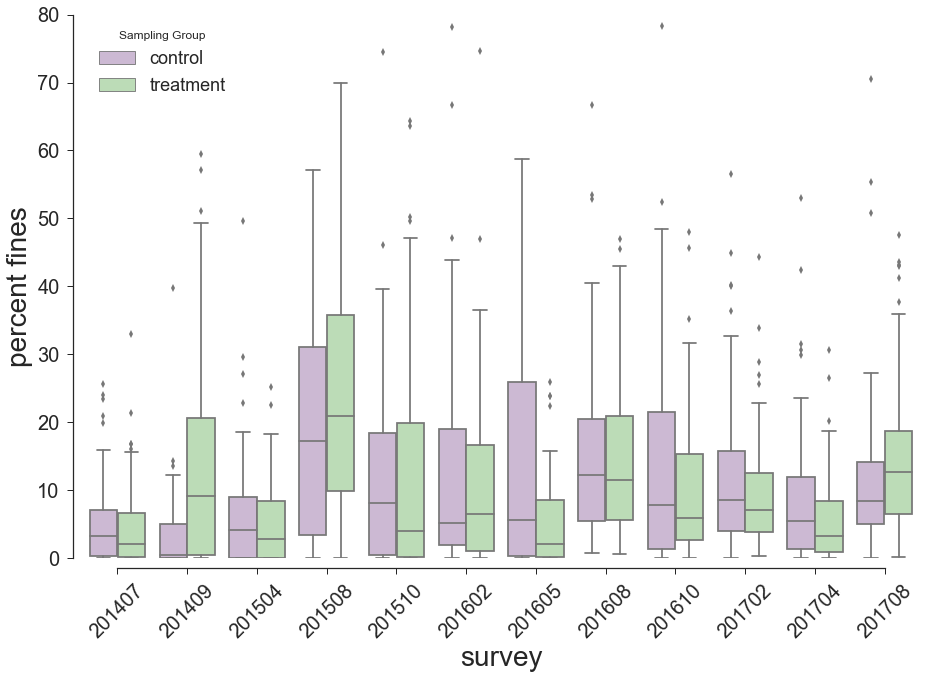

In [50]:
sns.set_context('talk')
figpf = plt.figure(figsize=(15,10))
axspf = figpf.add_subplot(1,1,1)
#figpf.tight_layout(pad=3.1, w_pad=0.5, h_pad=2.0)

sns.set(style="ticks")

# nested boxplot showing percent fines in samples by survey, by group
axf=sns.boxplot(x='survey', y='pfines', hue='group', data=df, palette='PRGn' )

axf.set(ylim=(0,80))
sns.despine(offset=10, trim=True)  # despine must come AFTER the axis limits are set!!!

plt.xticks(size=20, rotation=45)
plt.yticks(size=20)
#axf.set_xlabel('')    #
plt.xlabel('survey', fontsize=28)
plt.ylabel('percent fines', fontsize=28)
#axf.legend_.remove()
plt.legend(title='Sampling Group', fontsize=18, loc='best')

plt.savefig(plotpath+'percent_fines_all.jpg', dpi=300)       